In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

Lendos os Arquivos

In [2]:
df1 = pd.read_csv('C:\\Users\\conta\\testeV4\\testes_v4company\\fvendas.csv')
df2 = pd.read_csv('C:\\Users\\conta\\testeV4\\testes_v4company\\dproduto.csv')
df = pd.merge(df1, df2, on='ProductKey')


Transformando dados

In [3]:
def converter_para_float(valor):
    valor = valor.replace('R$', '').replace('.', '')
    valor = valor.replace(',', '.')
    return float(valor)

df['UnitPrice'] = df['UnitPrice'].apply(converter_para_float)


In [4]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df['year'] = df["OrderDate"].dt.year

Verficando duplicados

In [5]:
print(f'temos {df.duplicated().sum()} duplicados')


temos 0 duplicados


Verificando nulos

In [6]:
df.isnull().sum()


Valores Nulos: CustomerKey             0
DueDate                 0
OrderDate               0
ShipDate                0
ProductKey              0
SalesOrderNumber        0
OrderQuantity           0
CategoryName            0
ProductDetail       11009
ProductName             0
ProductSize             0
SubcategoryName         0
UnitPrice               0
year                    0
dtype: int64


verificando colunas numéricas

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60855 entries, 0 to 60854
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerKey       60855 non-null  int64         
 1   DueDate           60855 non-null  object        
 2   OrderDate         60855 non-null  datetime64[ns]
 3   ShipDate          60855 non-null  object        
 4   ProductKey        60855 non-null  int64         
 5   SalesOrderNumber  60855 non-null  object        
 6   OrderQuantity     60855 non-null  int64         
 7   CategoryName      60855 non-null  object        
 8   ProductDetail     49846 non-null  object        
 9   ProductName       60855 non-null  object        
 10  ProductSize       60855 non-null  object        
 11  SubcategoryName   60855 non-null  object        
 12  UnitPrice         60855 non-null  float64       
 13  year              60855 non-null  int32         
dtypes: datetime64[ns](1), 

estatistica descritiva

In [8]:
df[['UnitPrice', 'OrderQuantity']].describe()

,UnitPrice,OrderQuantity
count,60855.000000,60855.000000
mean,438.896084,3.522767
std,518.485561,3.033387
min,1.374000,1.000000
25%,34.995000,2.000000
50%,218.454000,3.000000
75%,672.294000,4.000000
max,2146.962000,44.000000


vendas por categoria

In [24]:
category = df[['CategoryName', 'OrderQuantity']]

<AxesSubplot:xlabel='CategoryName', ylabel='count'>

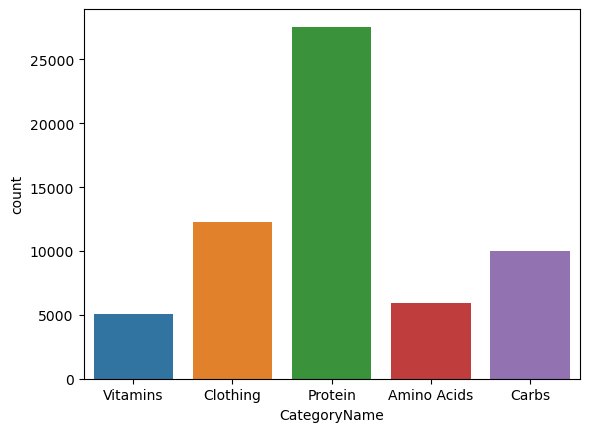

In [25]:
sns.countplot(x=category["CategoryName"])

vendas por ano

In [10]:

serie = df[["OrderQuantity", "year" ]]
serie =  serie.groupby('year')['OrderQuantity'].sum().reset_index()



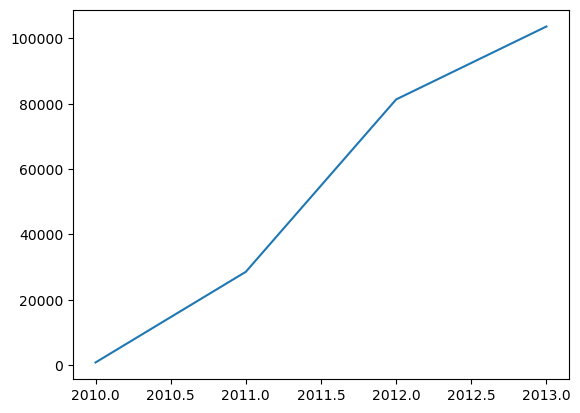

In [16]:

plt.plot(serie['year'], serie['OrderQuantity'])

relação entre preço e quantidade vendida 

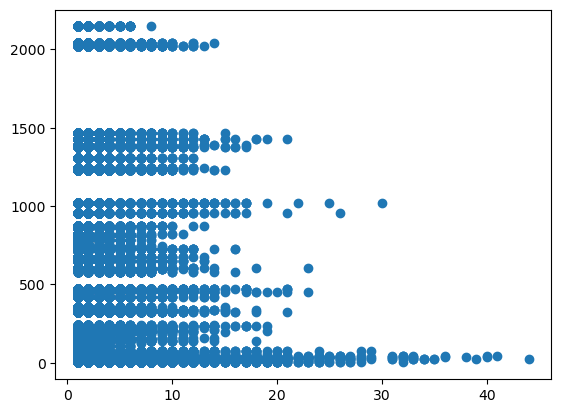

In [34]:
plt.scatter( df["OrderQuantity"], df["UnitPrice"])
plt.show()